In [1]:
load('VeeringGeneralFunctions.sage')

In [2]:
sig = 'hLALMkbcbefggghhwsemws_2112201'

In [3]:
get_LES_boundary_maps(sig)

[(a0 - 5*a1, -2*a0 + 7*a1), (-3*a0 + 3*a1, a0)]

In [4]:
cone = get_fibered_cone(sig)
cone.Hilbert_basis()

N(0, -1),
N(1,  0)
in 2-d lattice N

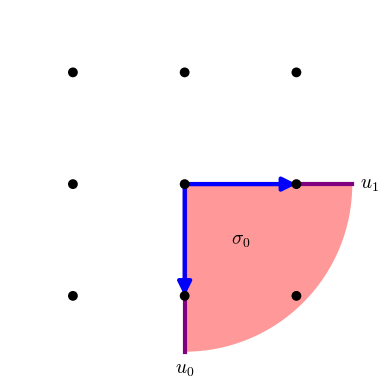

In [9]:
cone.plot()

In [15]:
get_Thurston_norm(sig)

2*a0 - 6*a1

In [ ]:
min_dir = get_minimal_direction(sig)
min_dir

In [ ]:
get_fibered_cone_and_levset_plot(sig)

In [6]:
m('cone = ConicHullRegion[{{0, 0}}, {{0,-1}, {1, 0}}]')
m('Reduce[{a, b} \[Element] cone, {a, b}]')

a >= 0 && b <= 0

In [16]:
m('Reduce[2*a - 6*b == n && {a, b} \[Element] cone && n \[Element] Reals, {a, b}]')

((n == 0 && a == 0) || (n > 0 && Inequality[0, LessEqual, a, LessEqual, 
    n/2])) && b == (2*a - n)/6

In [17]:
for n in range(20):
    print('Thurston norm ' + str(n))
    for a in range(floor(n/2)):
        b = (2*a - n)/6
        if cone.interior_contains(a,b) and (gcd(a,b) == 1):
            print('\t' + str((a,b)) + ' has genus ' + str(get_genus(sig,(a,b))))

Thurston norm 0
Thurston norm 1
Thurston norm 2
Thurston norm 3
Thurston norm 4
Thurston norm 5
Thurston norm 6
Thurston norm 7
Thurston norm 8
	(1, -1) has genus 3
Thurston norm 9
Thurston norm 10
	(2, -1) has genus 5
Thurston norm 11
Thurston norm 12
	(3, -1) has genus 5
Thurston norm 13
Thurston norm 14
	(1, -2) has genus 7
	(4, -1) has genus 6
Thurston norm 15
Thurston norm 16
	(5, -1) has genus 8
Thurston norm 17
Thurston norm 18
	(3, -2) has genus 8
	(6, -1) has genus 8
Thurston norm 19


In [18]:
def get_prim_int_lattice_pts_on_levset_arr_by_genus(Tnorm):
    # This function gets all the primitive integral points in the interior of the cone
    # on a given level set of the Thurston norm.
    preretval = []
    for a in range(floor(Tnorm/2)):
        b = (2*a - Tnorm)/6
        if cone.interior_contains(a,b) and (gcd(a,b) == 1):
            preretval.append(((a,b),get_genus(sig,(a,b))))
               
    genuses = [elt[1] for elt in preretval]
    max_genus = max(genuses)
    
    retval = [[] for i in range(max_genus + 1)]
    for elt in preretval:
        retval[elt[1]].append(elt[0])
        
    return retval

In [19]:
def make_point_and_one_tnorm_plot(Tnorm):
    min_dir_arrow = arrow((0, 0), (1,-1), color='cyan')
    picture = min_dir_arrow
    
    pts = get_prim_int_lattice_pts_on_levset_arr_by_genus(Tnorm)
            
    for i in range(len(pts)):
        #picture += points(pts[i], rgbcolor = rainbow(len(pts))[i], size = 50, legend_label='genus ' + str(i), label = i)
        for j in range(len(pts[i])):
            picture += text(str(i), pts[i][j], color = rainbow(len(pts))[i])
    
    Tnorm_levset = line([(Tnorm/2,0),(0,-Tnorm/6)])
    picture += Tnorm_levset
        
    return picture

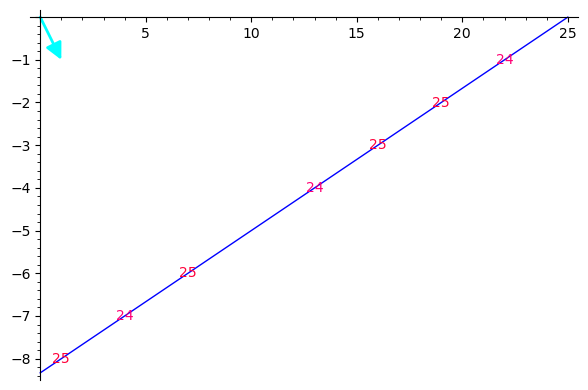

In [23]:
make_point_and_one_tnorm_plot(50)